<a href="https://colab.research.google.com/github/jessicabellas/Test-challenge/blob/master/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. Analysis: 
Vou iniciar a prática importando todos os pacotes que precisarei. 


In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms # para tratamento de missings

from pandas import read_csv
from pandas import set_option
from pandas_profiling import ProfileReport

from matplotlib import cm
from collections import Counter

from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import Normalizer # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV # para o grid search

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.svm import OneClassSVM
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline # para o pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Faça download do dataset no GitHub, salvando o arquivo em seu diretório de trabalho local com o nome stonedesafio.csv. Em seguida, importe o arquivo para a variável dataset, conforme mostrado no código abaixo. Indicaremos que as informações de cabeçalho (header) estão na primeira linha, que tem índice 0. 


In [ ]:
dataset = pd.read_csv('stonedesafio.csv')

dataset.columns = ['Idade', 'Segmento', 'Numero_Cartao', 
                   'Cartao_familia', 'Limite_Credito', 'Mes_transacao',
                    'Valor_Transacao', 'Limite_Transacao', 'Class'] 

print('Este dataset possui %s linhas e %s colunas' % (dataset.shape[0], dataset.shape[1]))

dataset.head()

Este dataset possui 9999 linhas e 9 colunas


,Idade,Segmento,Numero_Cartao,Cartao_familia,Limite_Credito,Mes_transacao,Valor_Transacao,Limite_Transacao,Class
0,39,1,7430689562274665,3,18000,1,8259,0.46,0
1,39,1,7430689562274665,3,18000,1,30684,1.70,0
2,39,1,7430689562274665,3,18000,2,3119,0.17,0
3,39,1,7430689562274665,3,18000,3,48677,2.70,0
4,39,1,7430689562274665,3,18000,4,17029,0.95,0


In [ ]:
dataset.rename(columns={'Segmento':'Seg','Numero_Cartao':'N_card' }, inplace=True )

In [ ]:
dataset.head()

,Idade,Segmento,Numero_Cartao,Cartao_familia,Limite_Credito,Mes_transacao,Valor_Transacao,Limite_Transacao,Class
0,39,1,7430689562274665,3,18000,1,8259,0.46,0
1,39,1,7430689562274665,3,18000,1,30684,1.70,0
2,39,1,7430689562274665,3,18000,2,3119,0.17,0
3,39,1,7430689562274665,3,18000,3,48677,2.70,0
4,39,1,7430689562274665,3,18000,4,17029,0.95,0


In [ ]:
dataset['Cartao_familia'].value_counts()

1    4099
3    3635
2    2265
Name: Cartao_familia, dtype: int64

In [ ]:
dataset.drop('Limite_Transacao', axis=1, inplace=True)

#Analise dos dados


Eu gostaria de saber como a linguagem Python está tratando estes dados, portanto, utilizarei o comando dtypes para tal.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Idade             9999 non-null   int64  
 1   Segmento          9999 non-null   int64  
 2   Numero_Cartao     9999 non-null   int64  
 3   Cartao_familia    9999 non-null   int64  
 4   Limite_Credito    9999 non-null   int64  
 5   Mes_transacao     9999 non-null   int64  
 6   Valor_Transacao   9999 non-null   int64  
 7   Limite_Transacao  9999 non-null   float64
 8   Class             9999 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 703.2 KB


In [ ]:
dataset.groupby('Class').size()

Class
0    9890
1     109
dtype: int64

Podemos verificar que há um desbalanceamento (98,9% x 1,1%) nos valores de classe. Isto quer dizer que o nosso modelo precisa ter uma acurácia maior do que 99% para que ele seja melhor do que o classificador de classe mais frequente (que sempre afirmaria que a transação é normal, e acertaria em torno de 98,9% das vezes).



In [ ]:
dataset.isnull().sum()

Idade               0
Segmento            0
Numero_Cartao       0
Cartao_familia      0
Limite_Credito      0
Mes_transacao       0
Valor_Transacao     0
Limite_Transacao    0
Class               0
dtype: int64

In [ ]:
# resumo estatístico
dataset.describe()

,Idade,Seg,N_card,Cartao_familia,Limite_Credito,Mes_transacao,Valor_Transacao,Class
count,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,35.570857,1.879288,5.668559e+15,1.953595,250862.886289,6.520752,24759.004900,0.010901
std,8.747060,0.869874,2.473714e+15,0.878294,268732.781334,3.436001,14371.783262,0.103843
min,20.000000,1.000000,1.113918e+15,1.000000,2000.000000,1.000000,103.000000,0.000000
25%,28.000000,1.000000,3.594219e+15,1.000000,35000.000000,4.000000,12316.000000,0.000000
50%,36.000000,2.000000,5.731980e+15,2.000000,140000.000000,7.000000,24721.000000,0.000000
75%,43.000000,3.000000,7.815771e+15,3.000000,406000.000000,10.000000,37036.500000,0.000000
max,50.000000,3.000000,9.999306e+15,3.000000,899000.000000,12.000000,49995.000000,1.000000


#Visualizações Unimodais


In [ ]:
dataset.hist(column='Idade')
plt.show()

In [ ]:
# histogramas
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,8))
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


A seguir, observaremos a mesma perspectiva dos dados usando gráficos de densidade de distribuição, com o comando dataset.plot. Esta visualização facilita a identificação da distribuição dos dados.


In [ ]:
# density plots
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(12,8))
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


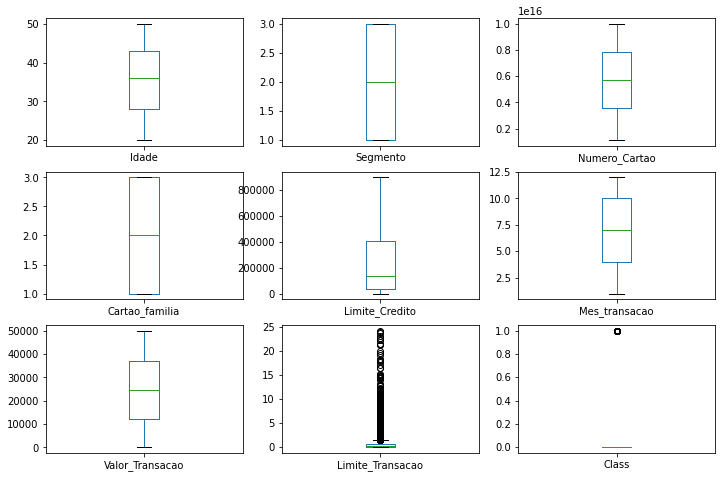

In [ ]:
# boxplots
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (12,8))
plt.show()

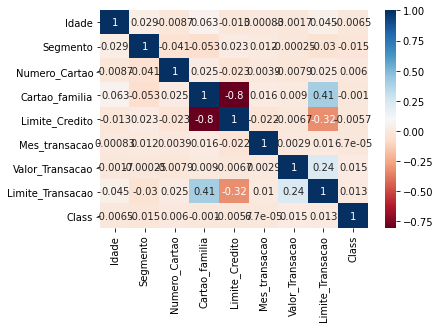

In [ ]:
# Matriz de Correlação
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Ao visualizar as correlações entre os atributos através da matriz de correlação, verificaremos que existem alguns atributos com uma alta correlação positiva, como cartão família e limite transação.

In [ ]:
# Correlação de Pearson
dataset.corr(method = 'pearson')

,Idade,Segmento,Numero_Cartao,Cartao_familia,Limite_Credito,Mes_transacao,Valor_Transacao,Limite_Transacao,Class
Idade,1.000000,0.029432,-0.008675,0.062829,-0.012845,0.000827,-0.001731,0.044682,-0.006521
Segmento,0.029432,1.000000,-0.040824,-0.053415,0.023384,0.012467,-0.000245,-0.030475,-0.015327
Numero_Cartao,-0.008675,-0.040824,1.000000,0.025320,-0.022536,0.003945,-0.007884,0.024621,0.005976
Cartao_familia,0.062829,-0.053415,0.025320,1.000000,-0.802238,0.016294,0.009018,0.406902,-0.001033
Limite_Credito,-0.012845,0.023384,-0.022536,-0.802238,1.000000,-0.021843,-0.006677,-0.318216,-0.005713
Mes_transacao,0.000827,0.012467,0.003945,0.016294,-0.021843,1.000000,0.002866,0.010325,0.000067
Valor_Transacao,-0.001731,-0.000245,-0.007884,0.009018,-0.006677,0.002866,1.000000,0.235909,0.014975
Limite_Transacao,0.044682,-0.030475,0.024621,0.406902,-0.318216,0.010325,0.235909,1.000000,0.013415
Class,-0.006521,-0.015327,0.005976,-0.001033,-0.005713,0.000067,0.014975,0.013415,1.000000


In [ ]:
# Instalando o pandas profiling (executar apenas na 1a vez - descomente a linha abaixo e execute o bloco de código)
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# geração do report
profile = ProfileReport(dataset, title='stonedesafio', html={'style':{'full_width':False}})
profile.to_notebook_iframe()

In [ ]:
# exportação do report
profile.to_file(output_file="stonedesafio.html")

Foi observado que temos dataset desbalanceado. 

Em seguida, irei definir uma semente aleatória, e farei a separação dos conjuntos de treino e teste por meio da função train_test_split(), que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino. 

In [ ]:
#Separando os atributos e as classes do dataset

array = dataset.values

X = array[:,0:8]
Y = array[:,8]

test_size = 0.20

seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=test_size, random_state=seed)

#Modelo de classificação 

In [ ]:
model = LogisticRegression(solver='liblinear')

model.fit(X_train, Y_train)

Y_predito = model.predict(X_test)

print('Acurácia: %.4f' % accuracy_score(Y_test, Y_predito))


Acurácia: 0.9900


In [ ]:
model = KNeighborsClassifier()

model.fit(X_train, Y_train)

Y_predito = model.predict(X_test)

print('Acurácia: %.4f' % accuracy_score(Y_test, Y_predito))

Acurácia: 0.9900


Acuracia 99% como ja esperado pelo dataset desbalanceado.

#Criação e avaliação de modelos: linha base.

Utilizando a validação cruzada 10-fold.
Os modelos criados serão avaliados e comparados a partir da métrica de acurácia. Inicialmente configuram-se os parâmetros de número de folds e métrica de avaliação.


In [ ]:
# Parâmetros
num_folds = 10
scoring = 'accuracy'

In [ ]:
# Criação dos modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=10)))
models.append(('ET', ExtraTreesClassifier(n_estimators=10)))

In [ ]:
# Avaliação dos modelos
results = []
names = []

for name, model in models:
  
   kfold = KFold(n_splits=num_folds)
   cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %0.4f (%0.4f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.9889 (0.0037)
KNN: 0.9889 (0.0037)
CART: 0.9751 (0.0068)
NB: 0.9889 (0.0037)
SVM: 0.9889 (0.0037)
AB: 0.9889 (0.0037)
GBM: 0.9852 (0.0040)
RF: 0.9885 (0.0034)
ET: 0.9867 (0.0029)


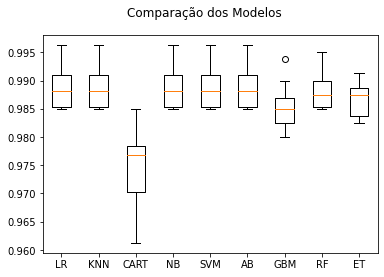

In [ ]:
# Comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Visualizando o gráfico conseguimos ver uma distribuição restrita para o LR, KNN, NB, SVM, AB e RF.

Dentre os resultados temos 5 com a mesma e mais alta acurácia: LR, KNN, NB, SVM e AB.

Diante de um dataset com "poucos dados" e desbalanceado temos uma complexidade maior para achar um bom modelo.

Ainda em busca de melhores resultados me aprofundarei mais nos 5 modelos com melhor acurácia.


#Comparando o desempenho dos modelos com Pipelines - Dados Padronizados e Normalizados

ScaledKNN: 0.988873 (0.003729)
ScaledAB: 0.988873 (0.003729)
ScaledNB: 0.988873 (0.003729)
ScaledSVM: 0.988873 (0.003729)
ScaledLR: 0.988873 (0.003729)


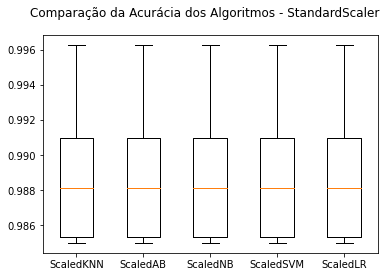

In [ ]:
# definindo uma seed global
np.random.seed(7)
# Parâmetros
folds = 10
scoring = 'accuracy'

# Pipelines para padronização do dataset e aplicação do modelo
pipelines = []
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(max_iter=200))])))

results = []
names = []

# Aplicação dos pipelines
for name, model in pipelines:
  kfold = KFold(n_splits=folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# boxplot de comparação dos algoritmos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Algoritmos - StandardScaler') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

NormKNN: 0.988748 (0.003876)
NormAB: 0.988873 (0.003729)
NormNB: 0.988873 (0.003729)
NormSVM: 0.988873 (0.003729)
NormLR: 0.988873 (0.003729)


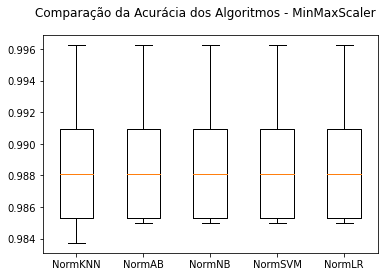

In [ ]:
# definindo uma seed global
np.random.seed(7) 
folds = 10
scoring = 'accuracy'

# Pipelines para madronização do dataset e aplicação do modelo
pipelines = []
pipelines.append(('NormKNN', Pipeline([('MinMaxScaler', MinMaxScaler()),('KNN', KNeighborsClassifier())]))) 
pipelines.append(('NormAB', Pipeline([('MinMaxScaler', MinMaxScaler()),('AB', AdaBoostClassifier())])))
pipelines.append(('NormNB', Pipeline([('MinMaxScaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('NormSVM', Pipeline([('MinMaxScaler', MinMaxScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('NormLR', Pipeline([('MinMaxScaler', MinMaxScaler()),('LR', LogisticRegression(max_iter=200))])))


results = []
names = []

# Aplicação dos pipelines
for name, model in pipelines:
  kfold = KFold(n_splits=folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# boxplot de comparação dos algoritmos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Algoritmos - MinMaxScaler') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

Percebemos que não obtivemos resultados numéricos diferentes utilizando as técnicas de padronização e normalização dos dados, porém o gráfico nos indica que o KNN tem uma distribuição mais próxima de uma distribuição normal. 

Então irei explorar um pouco mais o KNN na tentativa de um melhor resultado.
 



In [ ]:
# Tuning do KNN

k = [1,3,5,7,9,11,13,15]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric=distancias)

model = KNeighborsClassifier()

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
   print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.988873 usando {'metric': 'euclidean', 'n_neighbors': 5}
0.979372 (0.003637): {'metric': 'euclidean', 'n_neighbors': 1}
0.988373 (0.001862): {'metric': 'euclidean', 'n_neighbors': 3}
0.988873 (0.002128): {'metric': 'euclidean', 'n_neighbors': 5}
0.988873 (0.002128): {'metric': 'euclidean', 'n_neighbors': 7}
0.988873 (0.002128): {'metric': 'euclidean', 'n_neighbors': 9}
0.988873 (0.002128): {'metric': 'euclidean', 'n_neighbors': 11}
0.988873 (0.002128): {'metric': 'euclidean', 'n_neighbors': 13}
0.988873 (0.002128): {'metric': 'euclidean', 'n_neighbors': 15}
0.979372 (0.003637): {'metric': 'manhattan', 'n_neighbors': 1}
0.988373 (0.001862): {'metric': 'manhattan', 'n_neighbors': 3}
0.988873 (0.002128): {'metric': 'manhattan', 'n_neighbors': 5}
0.988873 (0.002128): {'metric': 'manhattan', 'n_neighbors': 7}
0.988873 (0.002128): {'metric': 'manhattan', 'n_neighbors': 9}
0.988873 (0.002128): {'metric': 'manhattan', 'n_neighbors': 11}
0.988873 (0.002128): {'metric': 'manhattan', 'n_

In [ ]:
base = KNeighborsClassifier()

model = BaggingClassifier(base_estimator=base, random_state=seed) 
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(results.mean())

0.9888731226533167


In [ ]:
model = KNeighborsClassifier()
print(model.get_params)
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>
0.9888731226533167


In [ ]:
# definindo uma seed global 

np.random.seed(7) 

# padronização os dados de treino
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# criando um modelo com a melhor configuração até o momento
model = KNeighborsClassifier(metric='euclidean', n_neighbors=5)
model.fit(rescaledX, Y_train)

# padronização dos dados de teste
rescaledTestX = scaler.transform(X_test)

# predição
predictions = model.predict(rescaledTestX)

# estimando a acurácia no conjunto de teste
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.99
[[1980    0]
 [  20    0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1980
         1.0       0.00      0.00      0.00        20

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.98      0.99      0.99      2000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
